In [119]:
import networkx as nx
import pandas as pd

dfcolumns = ['Person','Season','Episode','EpisodeTitle','Scene','ScreenLine']
df = pd.DataFrame(columns=dfcolumns)

sceneList = []

with open("../data/S8E1.txt",'r') as file:
    sceneName = ""
    season = 8
    episode = 1
    episodeTitle = "WinterFell"
    allLines = []
    for line in file:
        lineSplit = line.strip().split(":")
        
        if lineSplit[0] == "CUT TO":
            sceneName = lineSplit[1].strip()
            
            #Giving the sceneName an extra number if the sceneName occurs multiple times
            
            if sceneName in sceneList:
                sceneName = sceneName + "_" + str(sceneList.count(sceneName))
            sceneList.append(sceneName)

        elif line.startswith('TITLE SEQUENCE') or line.startswith('CREDITS') or line.startswith('EXT.') or line.startswith('INT.'):
            pass
        elif len(lineSplit) > 1 and len(lineSplit[1].strip()) > 0:
            person = lineSplit[0].split("(")[0].strip()
            screenLine = lineSplit[1]
            
            newEntry = [person, season, episode, episodeTitle, sceneName, screenLine]
            allLines.append(newEntry)

df = pd.DataFrame(allLines,columns=dfcolumns)




In [115]:
import networkx as nx
import pandas as pd

dfcolumns = ['Person','SeasonNr','EpisodeNr','EpisodeTitle','EpisodeID','Scene','ScreenLine']
df = pd.DataFrame(columns=dfcolumns)

sceneList = []

episodeID = 0

for sceneKey in screenplayDict:

    
    episodeTitle = sceneKey.split()[0]
    episodeID += 1
    seasonNr = sceneKey.split()[1]
    episodeInSeasonNr = sceneKey.split()[2]
    
    allLines = []
    sceneName = ""
    
    for line in screenplayDict[sceneKey].split("\n"):
        lineSplit = line.strip().split(":")
        
        if lineSplit[0] == "CUT TO":
            sceneName = lineSplit[1].strip()
            
            #Giving the sceneName an extra number if the sceneName occurs multiple times
            if sceneName in sceneList:
                sceneName = sceneName + "_" + str(sceneList.count(sceneName))
            sceneList.append(sceneName)

        elif line.startswith('TITLE SEQUENCE') or line.startswith('CREDITS') or line.startswith('EXT.') or line.startswith('INT.'):
            pass
        elif len(lineSplit) > 1:
            person = lineSplit[0]
            screenLine = lineSplit[1]
            
            newEntry = [person, seasonNr, episodeInSeasonNr, episodeTitle, episodeID, sceneName, screenLine]
            allLines.append(newEntry)

df = pd.DataFrame(allLines,columns=dfcolumns)


NameError: name 'screenplayDict' is not defined

In [120]:
print(set(df.Person))

{'EDD', 'SAMWELL', 'JON', 'JORAH', 'VARYS', 'QYBURN', 'THEON', 'SANDOR', 'DAENERYS', 'CERSEI', 'BRAN', 'HARRY', 'CRAYAH', 'UMBER', 'TORMUND', 'GENDRY', 'MAN 1', 'LYANNA MORMONT', 'BERIC', 'MAESTER WOLKAN', 'TYRION', 'DIRAH', 'ARYA', 'WOLKAN', 'MAN', 'DOTHRAKI MAN #1', 'SANSA', 'BRONN', 'YARA', 'MAREI', 'DAVOS', 'ROYCE', 'MAN 2', 'LYANNA', 'EURON'}


In [110]:
print(df)


      Person  Season  Episode EpisodeTitle                    Scene  \
0     TYRION       8        1   WinterFell     HORSE-DRAWN CARRIAGE   
1      VARYS       8        1   WinterFell     HORSE-DRAWN CARRIAGE   
2     TYRION       8        1   WinterFell     HORSE-DRAWN CARRIAGE   
3        JON       8        1   WinterFell     HORSE-DRAWN CARRIAGE   
4        JON       8        1   WinterFell  WINTERFELL – FRONT GATE   
..       ...     ...      ...          ...                      ...   
303    BERIC       8        1   WinterFell      WINTERFELL - CRYPTS   
304  TORMUND       8        1   WinterFell      WINTERFELL - CRYPTS   
305      EDD       8        1   WinterFell      WINTERFELL - CRYPTS   
306  TORMUND       8        1   WinterFell      WINTERFELL - CRYPTS   
307  TORMUND       8        1   WinterFell      WINTERFELL - CRYPTS   

                                            ScreenLine  
0     You should consider yourself lucky. At least ...  
1     You take great offense at d

In [111]:

G = nx.Graph()
EpisodeList = df.Scene
PersonList = df.Person
edges = list(zip(df.Scene, df.Person))

print(edges)
G.add_nodes_from(EpisodeList, bipartite = 0)
G.add_nodes_from(PersonList, bipartite = 1)



G.add_edges_from(edges)
print(G)
bottom_nodes, top_nodes = nx.bipartite.sets(G)
print(top_nodes)

[('HORSE-DRAWN CARRIAGE', 'TYRION'), ('HORSE-DRAWN CARRIAGE', 'VARYS'), ('HORSE-DRAWN CARRIAGE', 'TYRION'), ('HORSE-DRAWN CARRIAGE', 'JON'), ('WINTERFELL – FRONT GATE', 'JON'), ('WINTERFELL – FRONT GATE', 'JON'), ('WINTERFELL – FRONT GATE', 'BRAN'), ('WINTERFELL – FRONT GATE', 'JON'), ('WINTERFELL – FRONT GATE', 'SANSA'), ('WINTERFELL – FRONT GATE', 'JON'), ('WINTERFELL – FRONT GATE', 'DAENERYS'), ('WINTERFELL – FRONT GATE', 'SANSA'), ('WINTERFELL – FRONT GATE', 'BRAN'), ('WINTERFELL – FRONT GATE', 'BRAN'), ('WINTERFELL – LARGE HALL', 'SANSA'), ('WINTERFELL – LARGE HALL', 'UMBER'), ('WINTERFELL – LARGE HALL', 'UMBER'), ('WINTERFELL – LARGE HALL', 'UMBER'), ('WINTERFELL – LARGE HALL', 'SANSA'), ('WINTERFELL – LARGE HALL', 'JON'), ('WINTERFELL – LARGE HALL', 'MAESTER WOLKAN'), ('WINTERFELL – LARGE HALL', 'LYANNA MORMONT'), ('WINTERFELL – LARGE HALL', 'LYANNA'), ('WINTERFELL – LARGE HALL', 'LYANNA'), ('WINTERFELL – LARGE HALL', 'JON'), ('WINTERFELL – LARGE HALL', 'LYANNA'), ('WINTERFELL –

NodeView(('EDD', 'SAMWELL', 'JON', 'JORAH', 'MAN 2 ', 'VARYS', 'QYBURN', 'SANDOR', 'YARA ', 'JON walks up to SAMWELL', 'THEON', 'QYBURN ', 'DAENERYS', 'CERSEI', 'LYANNA', 'BRAN', 'HARRY', 'CRAYAH', 'UMBER', 'TORMUND', 'JON ', 'GENDRY', 'MAN 1', 'LYANNA MORMONT', 'BERIC', 'MAESTER WOLKAN', 'TYRION', 'DIRAH', 'ARYA', 'WOLKAN', 'MAN', 'DAENERYS ', 'DOTHRAKI MAN #1', 'SANSA', 'BRONN', 'YARA', 'MAREI', 'DAVOS', 'ROYCE', 'MAN 2', 'ARYA ', 'EURON', 'GENDRY '))

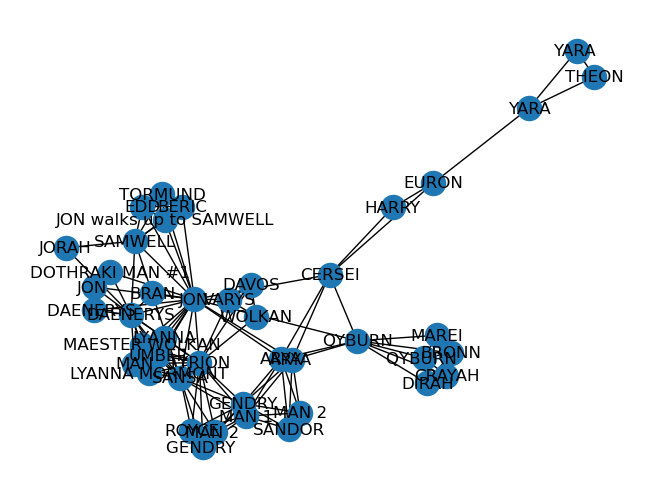

In [108]:
B = nx.bipartite.projected_graph(G, top_nodes)
nx.draw(B, with_labels = True)

B.nodes()


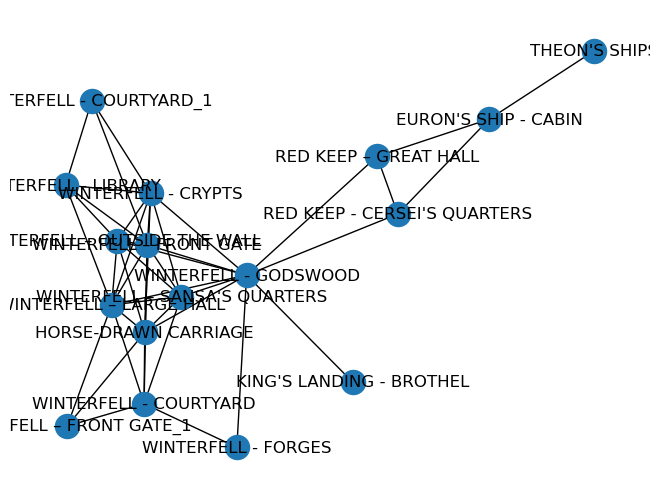

In [102]:
B = nx.bipartite.projected_graph(G, bottom_nodes)
nx.draw(B, with_labels = True)